# Pre-Main Sequence Evolution

Figure 7.2 from Chapter 7 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of a theoretical H-R diagram with [MIST](http://waps.cfa.harvard.edu/MIST/) solar-metallicity evolution
tracks and isochrones for pre-main sequence stars for masses of 0.1, 0.25, 0.5, 1, 2, 4, and 6 M<sub>sun</sun>.

Uses data pre-extracted from the following evolutionary tracks (EEP) and theoretical isochrone (.iso) files
forMIST v1.0 models with the following parameters:
 * [Fe/H]=0.0 (solar metallicity)
 * v/v<sub>crit</sub>=0.4
 
Specific files:
 * `MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS/#####M.track.eep` where `#####` is the mass in units of 0.01M<sub>sun</sub>
 * `MIST_v1.0_vvcrit0.4_full_isos/MIST_v1.0_feh_p0.00_afe_p0.0_vvcrit0.4_full.iso`
 
The ASCII files extracted are in the `MIST` subfolder with this notebook.  We also use a pre-extracted
zero-age main sequence (ZAMS) data for this set of models named `MIST_FeH0_ZAMS.txt`.

See also the supplementary notebook `Extract PMS Tracks.ipynb` which shows how the files were extracted
from the MIST v1.0 database files.  The MIST data are >3Gb in size and not included with these notebooks.

In [3]:
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [4]:
plotFile = 'Fig7_2.png' 

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Evolutionary tracks and isochrones are from the MIST database, v1.0, [Fe/H]=0.0 ("solar"), v/v$_{crit}$=0.4, 
pre-extracted as ASCII text files.

We also have a pre-extracted Zero-Age Main Sequence (ZAMS) for this set of models.  If using another model,you'll need to generate a new ZAMS file.

In [5]:
mistPath = 'MIST'

# ZAMS file & data (load now)

zamsFile = 'MIST_FeH0_ZAMS.txt'
zamsData = pd.read_csv(zamsFile,sep=r'\s+',comment='#')
zamsT = np.array(zamsData['Teff'])
zamsL = np.array(zamsData['Lsun'])

# List of masses and ages

massList = [0.1,0.25,0.5,1.0,2.0,4.0,6.0]
logAges = [5.0,6.0,7.0,8.0]

# Load the PMS evolutionary tracks for each mass

evoT = {}
evoL = {}

for mass in massList:
    trackFile = f'{mistPath}/pms_M{mass:.2f}_track.txt'
    trackData = pd.read_csv(trackFile,sep=r'\s+',comment='#')
    evoT[mass] = 10.0**np.array(trackData['logTe'])
    evoL[mass] = 10.0**np.array(trackData['logL'])
    
# load the isochrones for each logAge 

isoT = {}
isoL = {}
for age in logAges:
    isoFile = f'{mistPath}/pms_t1e{int(age):d}_iso.txt'
    isoData = pd.read_csv(isoFile,sep=r'\s+',comment='#')
    isoT[age] = 10.0**np.array(isoData['logTe'])
    isoL[age] = 10.0**np.array(isoData['logL'])

# plotting limits

minT = 2000.0
maxT = 35000.0
minL = 0.0006
maxL = 1.0E4

# mass range

minM = np.min(massList)
maxM = np.max(massList)

## Make the plot

Plot the theoretical H-R diagram, with the following line styles
 * ZAMS = heavy solid line
 * Evolutionary Tracks = thin solid lines
 * Isochrones = dotted lines

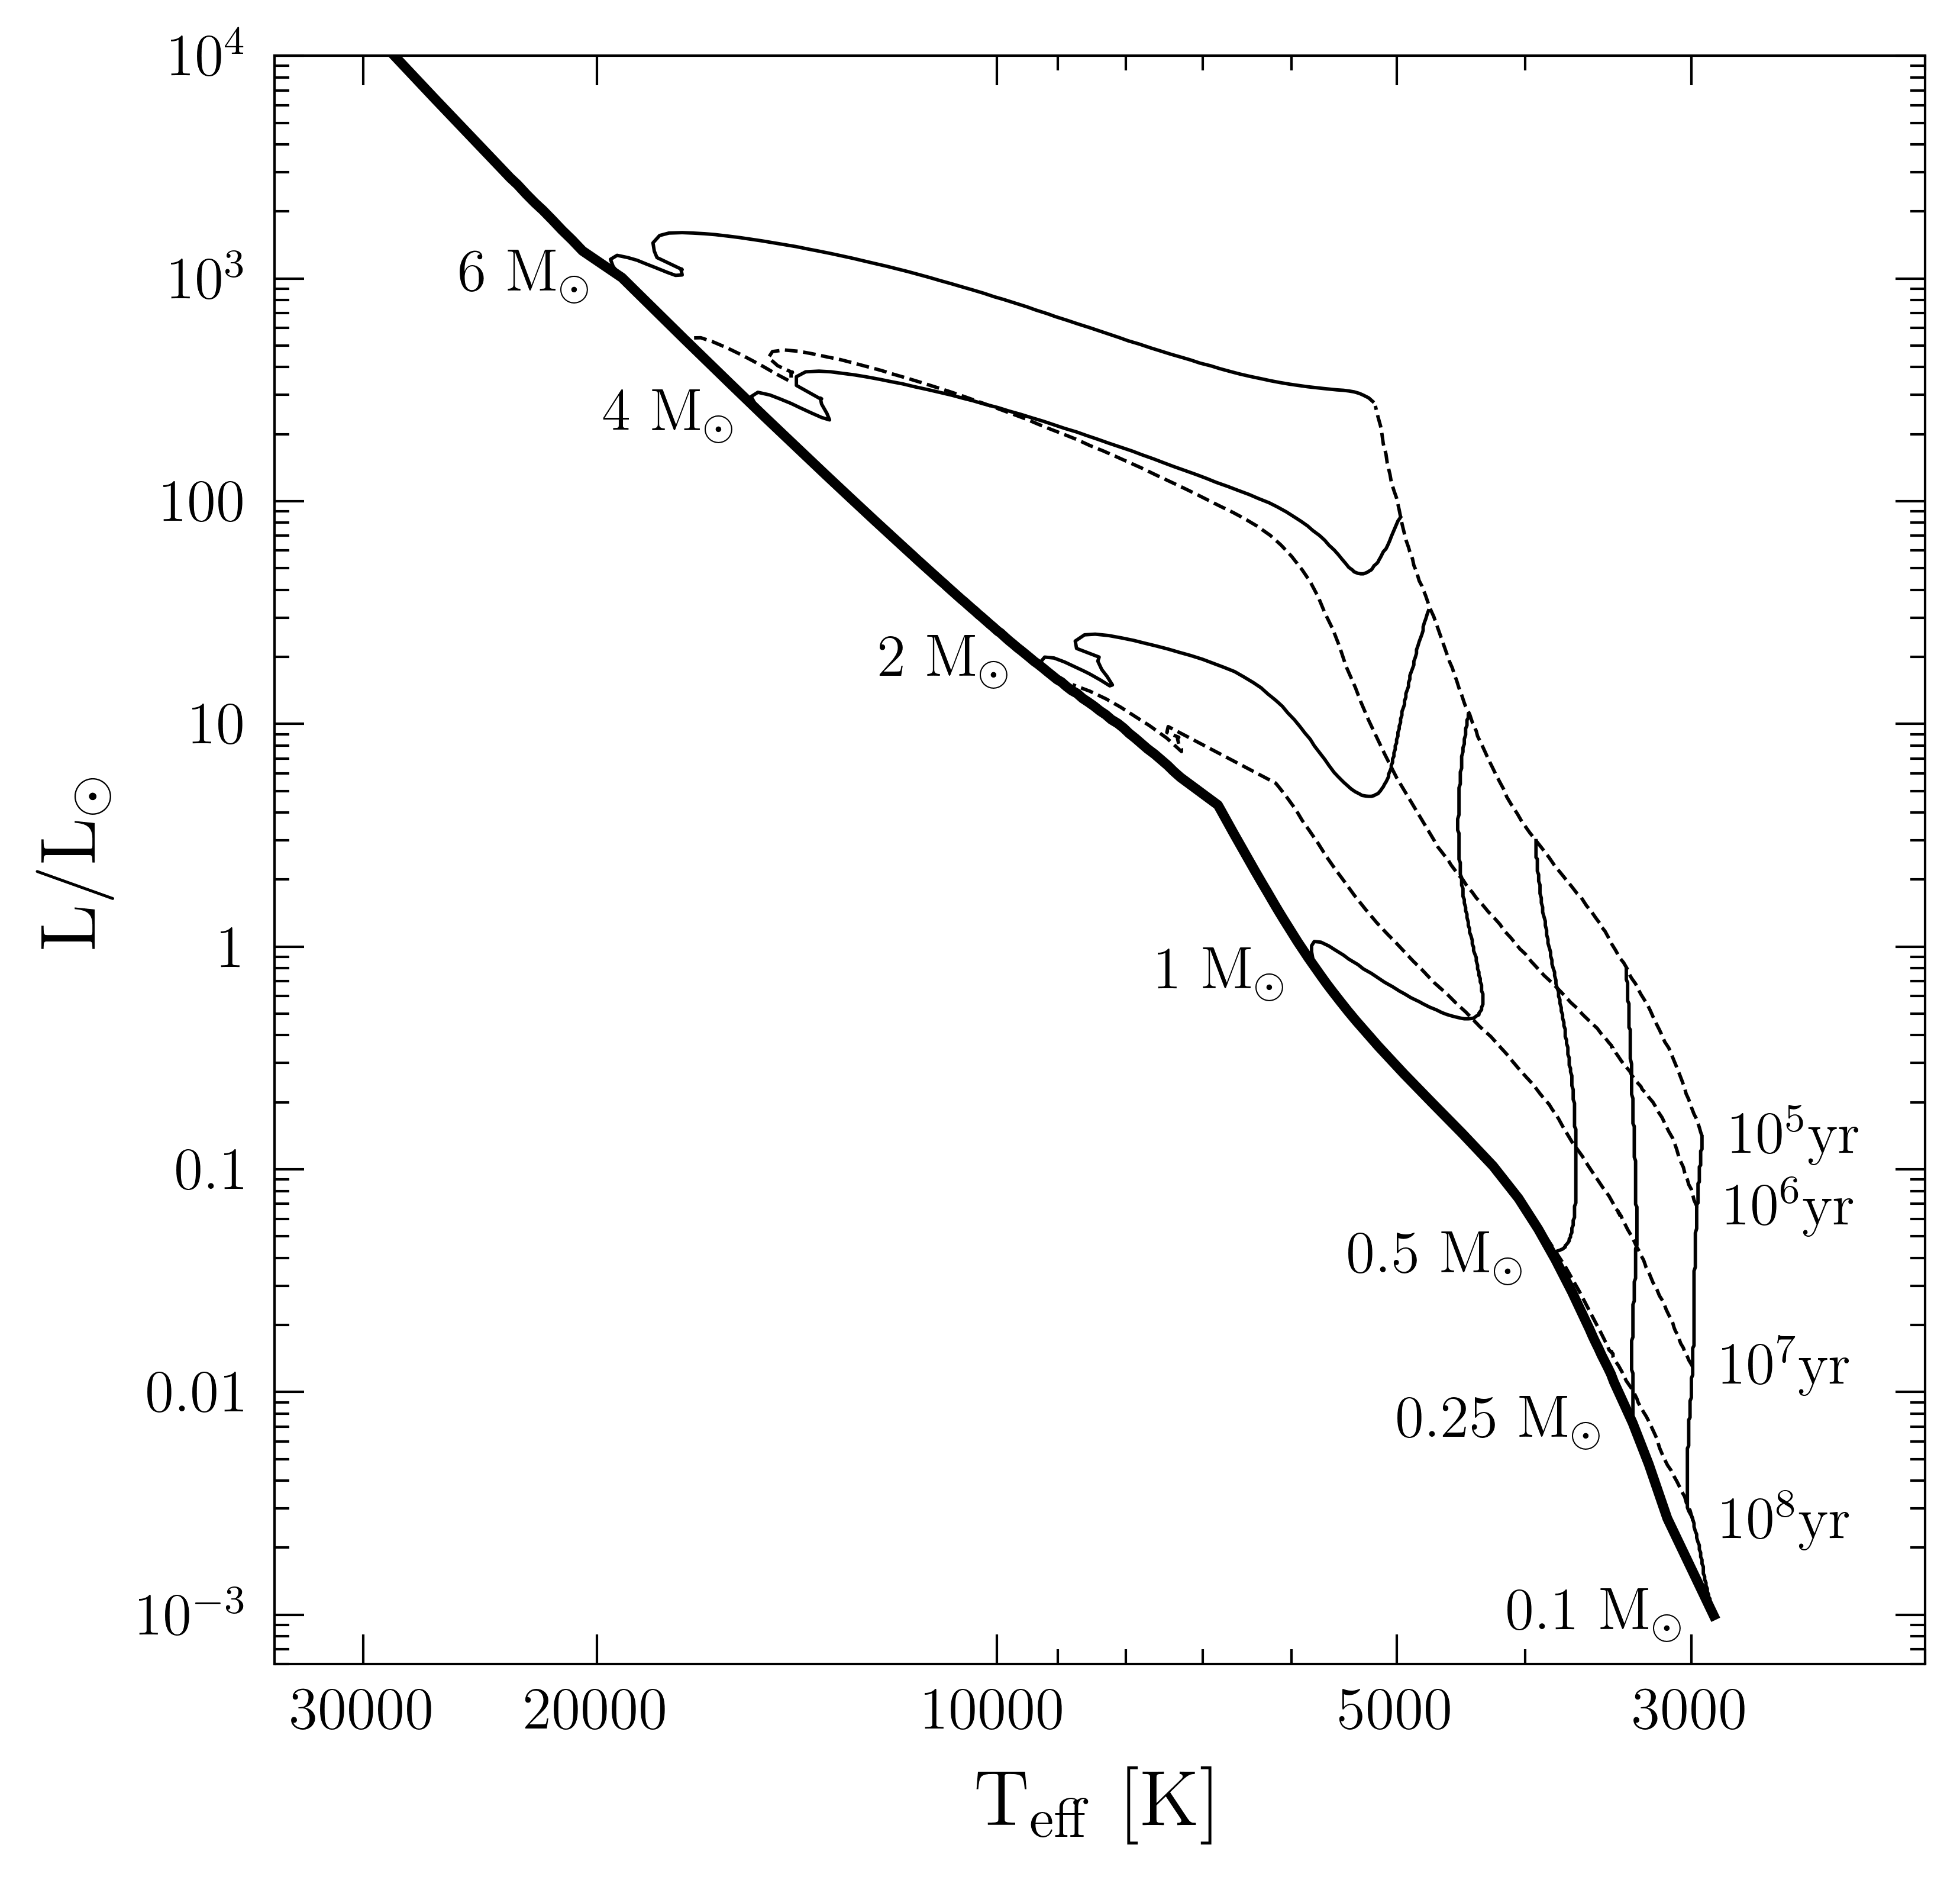

In [6]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(maxT,minT)
ax.set_ylim(minL,maxL)

ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([3000.,5000.,10000.,20000.,30000.])
ax.set_xticklabels(['3000','5000','10000','20000','30000'])
ax.set_xlabel(r'T$_{\rm eff}$ [K]',fontsize=16)

ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([0.001,0.01,0.1,1,10,100,1000,1e4])
ax.set_yticklabels(['10$^{-3}$','0.01','0.1','1','10','100','10$^3$','10$^4$'])
ax.set_ylabel(r'L/L$_{\odot}$',fontsize=16)

# ZAMS

ax.plot(zamsT,zamsL,'-',color='black',lw=2)

# Evolutionary tracks

for mass in massList:
    ax.plot(evoT[mass],evoL[mass],'-',color='black',lw=0.7,zorder=10)
    if mass < 1.0:
        if mass == 0.25:
            ax.text(1.05*evoT[mass][-1],evoL[mass][-1],rf'{mass:.2f} M$_\odot$',ha='right',va='center',fontsize=axisFontSize)
        else:
            ax.text(1.05*evoT[mass][-1],evoL[mass][-1],rf'{mass:.1f} M$_\odot$',ha='right',va='center',fontsize=axisFontSize)
    else:
        ax.text(1.05*evoT[mass][-1],evoL[mass][-1],rf'{int(mass):d} M$_\odot$',ha='right',va='center',fontsize=axisFontSize)

# Isochrones

for age in logAges:
    ax.plot(isoT[age],isoL[age],'--',color='black',zorder=9,lw=0.7)
    ax.text(0.95*isoT[age][0],isoL[age][0],rf'10$^{int(age):d}$yr',ha='left',va='center',
             fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')